# Classification Mid-term Project: Wisconsin Breast Cancer
- Dataset from UCI repository
- https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Original)

## 0. Load libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Imputer
from sklearn import cross_validation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

ImportError: cannot import name 'cross_validation' from 'sklearn' (C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\__init__.py)

## 1. Load the dataset

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['Code', 'Clump-Thickness', 'Cell-Size', 'Cell-Shape', 'Adhesion', 'Single-Cell-Size', 'Bare-Nuclei', 'Chromatin', 'Nucleoli', 'Mitoses', 'Class']
dataset = pd.read_csv(url, names=names)

In [ ]:
dataset.head(5)

## 2. Data preprocessing 

In [ ]:
# delete code
dataset.drop('Code', axis=1, inplace=True)
# mark ? as NaN
dataset['Bare-Nuclei'] = dataset['Bare-Nuclei'].replace('?', np.NaN)
# Convert the type of 'Bare-Nuclei' column as float
dataset['Bare-Nuclei'] = dataset['Bare-Nuclei'].astype(float)
# Drop NaN
dataset.dropna(axis=0, how='any', inplace=True)

In [ ]:
dataset.head(5)

## 3. Data summarization

In [ ]:
# shape
print(dataset.shape)

In [ ]:
# types
print(dataset.dtypes)

In [ ]:
# descriptions, change precision to 3 places
pd.set_option('precision', 3)
pd.set_option('display.width', 200)
print(dataset.describe())

In [ ]:
# class distribution
print(dataset.groupby('Class').size())

In [ ]:
# correlation
print(dataset.corr(method='pearson'))

## 4. Data visualization

In [ ]:
# Determine the size of figures made by pyplot
plt.rcParams['figure.figsize'] = (15,15)

In [ ]:
# histograms
dataset.hist()
plt.show()

In [ ]:
# density
dataset.plot(kind='density', subplots=True, layout=(4,3), sharex=False)
plt.show()

In [ ]:
# box plots
dataset.plot(kind='box', subplots=True, layout=(4,3), sharex=False, sharey=False)
plt.show()

In [ ]:
# scatter plot matrix
scatter_matrix(dataset)
plt.show()

In [ ]:
# correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = np.arange(0,10,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names[1:11])
ax.set_yticklabels(names[1:11])
plt.show()

In [ ]:
# Determine the size of figures made by pyplot
plt.rcParams['figure.figsize'] = (10,6)

## 5.  Preparation

In [2]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:9]
Y = array[:,9]
test_size = 0.20
seed = 15
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, Y, test_size=test_size, random_state=seed)

NameError: name 'dataset' is not defined

In [3]:
# Evaluate Algorithms
# Test options and evaluation metric
num_folds = 10
num_instances = len(X_train)
seed = 7
scoring = 'accuracy'

NameError: name 'X_train' is not defined

## 6. Learn models

### Base models

In [20]:
from sklearn.neural_network import MLPClassifier

In [21]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('MLP', MLPClassifier()))

In [22]:
models

[('LR',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
            penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
            verbose=0, warm_start=False)),
 ('LDA',
  LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                solver='svd', store_covariance=False, tol=0.0001)),
 ('KNN',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=1, n_neighbors=5, p=2,
             weights='uniform')),
 ('CART',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, presort=False, random_state=None,
              splitter='best')),
 ('NB', 

In [23]:
results = []
names = []

kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)

for name, model in models:
    cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "[%s]\tmean: %f\tstd: %f" % (name, cv_results.mean(), cv_results.std())
    print(msg)

[LR]	mean: 0.965219	std: 0.019105
[LDA]	mean: 0.963367	std: 0.018253
[KNN]	mean: 0.967071	std: 0.026935
[CART]	mean: 0.939562	std: 0.025929
[NB]	mean: 0.970741	std: 0.012114
[RF]	mean: 0.963468	std: 0.023081


/Users/kth/miniconda3/envs/ml/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kth/miniconda3/envs/ml/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kth/miniconda3/envs/ml/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kth/miniconda3/envs/ml/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the op

[MLP]	mean: 0.956061	std: 0.022030


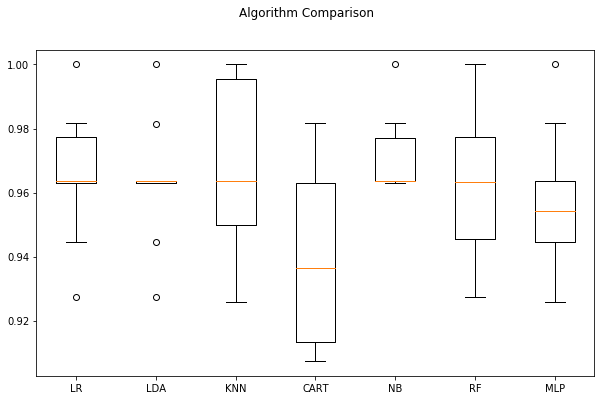

In [24]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


### Base models with standardization

In [25]:
# Standardize the dataset
models = []
models.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
models.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
models.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
models.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
models.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
models.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier())])))

In [26]:
models

[('ScaledLR', Pipeline(memory=None,
       steps=[('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('LR', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
            penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
            verbose=0, warm_start=False))])),
 ('ScaledLDA', Pipeline(memory=None,
       steps=[('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('LDA', LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                solver='svd', store_covariance=False, tol=0.0001))])),
 ('ScaledKNN', Pipeline(memory=None,
       steps=[('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('KNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=1, n_neighbors=5, p=2,
             weights='uniform'))])),
 ('ScaledCART', Pipe

In [27]:
results = []
names = []
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
for name, model in models:
    cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "[%s]\tmean: %f\tstd: %f" % (name, cv_results.mean(), cv_results.std())
    print(msg)

[ScaledLR]	mean: 0.967071	std: 0.017858
[ScaledLDA]	mean: 0.963367	std: 0.018253
[ScaledKNN]	mean: 0.968923	std: 0.024576
[ScaledCART]	mean: 0.943232	std: 0.022222
[ScaledNB]	mean: 0.970741	std: 0.012114
[ScaledRF]	mean: 0.967071	std: 0.019685


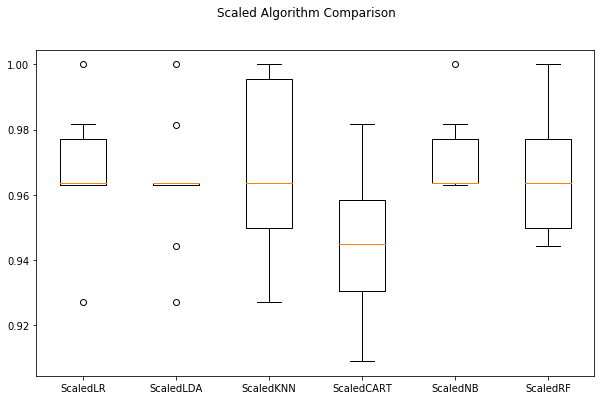

In [28]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Base models with normalization

In [29]:
# Normalize the dataset
models = []
models.append(('ScaledLR', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('LR', LogisticRegression())])))
models.append(('ScaledLDA', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('LDA', LinearDiscriminantAnalysis())])))
models.append(('ScaledKNN', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('KNN', KNeighborsClassifier())])))
models.append(('ScaledCART', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('CART', DecisionTreeClassifier())])))
models.append(('ScaledNB', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('NB', GaussianNB())])))
models.append(('ScaledRF', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('RF', RandomForestClassifier())])))
results = []
names = []
for name, model in models:
    kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
    cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "[%s]\tmean: %f\tstd: %f" % (name, cv_results.mean(), cv_results.std())
    print(msg)

[ScaledLR]	mean: 0.968889	std: 0.020057
[ScaledLDA]	mean: 0.963367	std: 0.018253
[ScaledKNN]	mean: 0.967071	std: 0.026935
[ScaledCART]	mean: 0.934074	std: 0.026014
[ScaledNB]	mean: 0.970741	std: 0.012114
[ScaledRF]	mean: 0.965185	std: 0.019141


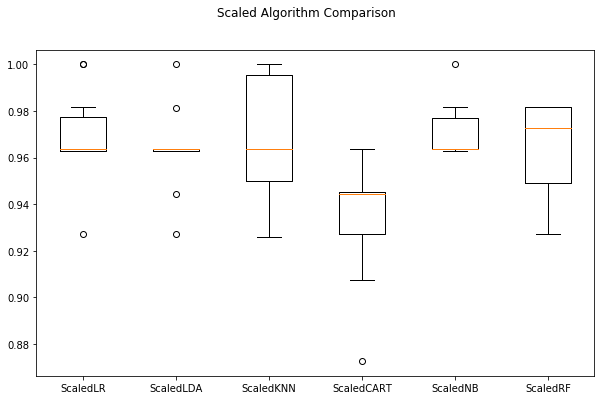

In [30]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Parameter tuning: k-NN classifier

In [31]:
model = Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])

neighbors = [1,3,5,7,9,11,13,15,17,19,21]
weights_set = ['uniform', 'distance']
param_grid = {'KNN__n_neighbors':neighbors,
             'KNN__weights': weights_set} # Pipeline을 이용한 경우, 어떤 모델의 파라미터를 조정할 것인지 정의해야만 함


In [32]:
# model = Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])

# neighbors = [1,3,5,7,9,11,13,15,17,19,21]
# weights_set = ['uniform', 'distance']
# param_grid = {'KNN__n_neighbors':neighbors,
#              'KNN__weights': weights_set} # Pipeline을 이용한 경우, 어떤 모델의 파라미터를 조정할 것인지 정의해야만 함

# for neighbor in neighbors:
#     for param2 in param2_set:
#         model = KNeighborsClassifier(n_neighbors=neighbor, param2 = param2)
#     ....

kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
for params, mean_score, scores in grid_result.grid_scores_:
    print("%f (%f) with: %r" % (scores.mean(), scores.std(), params))

Best: 0.972527 using {'KNN__n_neighbors': 3, 'KNN__weights': 'uniform'}
0.957912 (0.020114) with: {'KNN__n_neighbors': 1, 'KNN__weights': 'uniform'}
0.957912 (0.020114) with: {'KNN__n_neighbors': 1, 'KNN__weights': 'distance'}
0.972593 (0.022008) with: {'KNN__n_neighbors': 3, 'KNN__weights': 'uniform'}
0.972593 (0.022008) with: {'KNN__n_neighbors': 3, 'KNN__weights': 'distance'}
0.968923 (0.024576) with: {'KNN__n_neighbors': 5, 'KNN__weights': 'uniform'}
0.968923 (0.024576) with: {'KNN__n_neighbors': 5, 'KNN__weights': 'distance'}
0.967037 (0.021391) with: {'KNN__n_neighbors': 7, 'KNN__weights': 'uniform'}
0.968889 (0.023280) with: {'KNN__n_neighbors': 7, 'KNN__weights': 'distance'}
0.968923 (0.021606) with: {'KNN__n_neighbors': 9, 'KNN__weights': 'uniform'}
0.968923 (0.021606) with: {'KNN__n_neighbors': 9, 'KNN__weights': 'distance'}
0.970707 (0.020321) with: {'KNN__n_neighbors': 11, 'KNN__weights': 'uniform'}
0.970707 (0.020321) with: {'KNN__n_neighbors': 11, 'KNN__weights': 'distanc

/Users/kth/miniconda3/envs/ml/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [33]:
fine_tuned_scaled_KNN = grid_result.best_estimator_
print(fine_tuned_scaled_KNN)

Pipeline(memory=None,
     steps=[('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('KNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform'))])


## Exercise 1
- GridSearchCV를 이용하여 RandomForestClassifier의 성능을 높여보세요.
- 변화를 줄 parameter: n_estimators, max_features
- 각 parameter의 후보군은 각자 세팅해보시기 바랍니다.

In [ ]:
?RandomForestClassifier

In [34]:
model = RandomForestClassifier()

n_estimators_set = [5, 10, 15, 20, 25, 30, 35, 40]
max_features_set = ["sqrt", "log2", None]
param_grid = dict(n_estimators = n_estimators_set,
                  max_features = max_features_set)
# param_grid = {'n_estimators': n_estimators_set,
#               'max_features': max_features_set}

kfold = cross_validation.KFold(n = num_instances, n_folds = num_folds, random_state = seed)
grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring = scoring, cv = kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
for params, mean_score, scores in grid_result.grid_scores_:
    print("%f (%f) with: %r" % (scores.mean(), scores.std(), params))

Best: 0.970696 using {'max_features': 'sqrt', 'n_estimators': 25}
0.961582 (0.022260) with: {'max_features': 'sqrt', 'n_estimators': 5}
0.967071 (0.017927) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.968855 (0.016483) with: {'max_features': 'sqrt', 'n_estimators': 15}
0.967037 (0.016024) with: {'max_features': 'sqrt', 'n_estimators': 20}
0.970707 (0.018690) with: {'max_features': 'sqrt', 'n_estimators': 25}
0.968923 (0.020140) with: {'max_features': 'sqrt', 'n_estimators': 30}
0.967071 (0.022798) with: {'max_features': 'sqrt', 'n_estimators': 35}
0.968923 (0.021720) with: {'max_features': 'sqrt', 'n_estimators': 40}
0.961582 (0.023647) with: {'max_features': 'log2', 'n_estimators': 5}
0.968956 (0.021625) with: {'max_features': 'log2', 'n_estimators': 10}
0.970673 (0.016880) with: {'max_features': 'log2', 'n_estimators': 15}
0.965286 (0.022293) with: {'max_features': 'log2', 'n_estimators': 20}
0.970774 (0.016725) with: {'max_features': 'log2', 'n_estimators': 25}
0.965253 (0.0

/Users/kth/miniconda3/envs/ml/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [35]:
fine_tuned_RF = grid_result.best_estimator_
fine_tuned_RF.feature_importances_

array([0.04505553, 0.28708511, 0.15274709, 0.01655664, 0.12462909,
       0.18298049, 0.15489179, 0.02874402, 0.00731025])

In [36]:
dataset.columns[0:-1]

Index(['Clump-Thickness', 'Cell-Size', 'Cell-Shape', 'Adhesion', 'Single-Cell-Size', 'Bare-Nuclei', 'Chromatin', 'Nucleoli', 'Mitoses'], dtype='object')

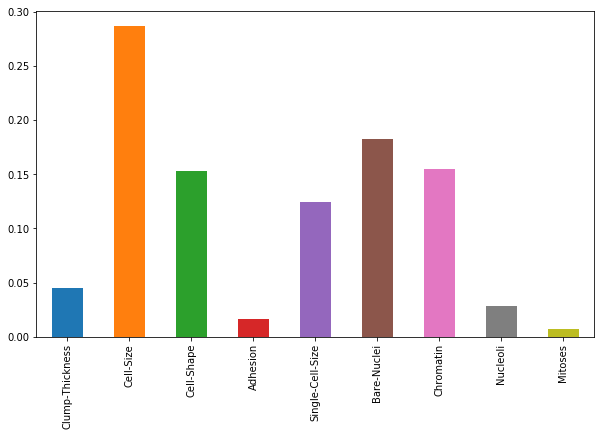

In [37]:
importances = pd.Series(fine_tuned_RF.feature_importances_, index = dataset.columns[0:-1])
importances.plot(kind='bar')

## Exercise 2
- 지금까지의 모델링은 Train set을 cross-validation한 부분까지 완성되어 있습니다.
- 만들어진 모델을 Test set에 적용하여 예측성능을 평가해주세요.

In [38]:
tuned_models = []
tuned_models.append(('Tuned_scaled_KNN', fine_tuned_scaled_KNN))
tuned_models.append(('Tuned_RF', fine_tuned_RF))

In [39]:
tuned_models

[('Tuned_scaled_KNN', Pipeline(memory=None,
       steps=[('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('KNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=1, n_neighbors=3, p=2,
             weights='uniform'))])),
 ('Tuned_RF',
  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=None, max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
              oob_score=False, random_state=None, verbose=0,
              warm_start=False))]

In [40]:
cms = []
scores = []
names = []
for name, model in tuned_models:
    Y_test_hat = model.predict(X_test)
    cms.append(confusion_matrix(Y_test, Y_test_hat))
    scores.append(accuracy_score(Y_test, Y_test_hat))
    names.append(name)

In [41]:
for name, score, cm in list(zip(names, scores, cms)):
    print('\n[%s]' % name)
    print('- test accuracy: %f' % score)
    print('- cm :\n', cm)


[Tuned_scaled_KNN]
- test accuracy: 0.956204
- cm :
 [[79  2]
 [ 4 52]]

[Tuned_RF]
- test accuracy: 0.948905
- cm :
 [[78  3]
 [ 4 52]]


## Support Vector Classifier

In [42]:
from sklearn.svm import SVC

In [43]:
?SVC

In [44]:
%time

model = SVC()

C_set = [1, 10, 50, 100]
kernel_set = ["linear", "poly", "rbf"]
degree_set = [2, 3, 4, 5]
gamma_set = [0.01, 0.05, 0.1, 0.5]

param_grid = dict(C=C_set, 
                  kernel=kernel_set, 
                  degree=degree_set, 
                  gamma=gamma_set)

kfold = cross_validation.KFold(n = num_instances, n_folds = num_folds, random_state = seed)
grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring = scoring, cv = kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
for params, mean_score, scores in grid_result.grid_scores_:
    print("%f (%f) with: %r" % (scores.mean(), scores.std(), params))

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.91 µs


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/kth/miniconda3/envs/ml/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-44-a19c8c2bf872>", line 17, in <module>
    grid_result = grid.fit(X_train, Y_train)
  File "/Users/kth/miniconda3/envs/ml/lib/python3.6/site-packages/sklearn/model_selection/_search.py", line 639, in fit
    cv.split(X, y, groups)))
  File "/Users/kth/miniconda3/envs/ml/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py", line 779, in __call__
    while self.dispatch_one_batch(iterator):
  File "/Users/kth/miniconda3/envs/ml/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py", line 625, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/kth/miniconda3/envs/ml/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py", line 588, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/Us

KeyboardInterrupt: 

In [ ]:
fine_tuned_SVC = grid_result.best_estimator_

In [ ]:
Y_test_hat = fine_tuned_SVC.predict(X_test)
print(confusion_matrix(Y_test, Y_test_hat))
print(accuracy_score(Y_test, Y_test_hat))

In [ ]:
from sklearn.externals import joblib  # 모델을 피클로 저장해 두면 나중에 쓸 수 있음
joblib.dump(fine_tuned_SVC, 'SVC.pkl')
joblib.dump(fine_tuned_RF, 'RF.pkl')
joblib.dump(fine_tuned_scaled_KNN, 'KNN.pkl')

In [ ]:
loaded_SVC = joblib.load('SVC.pkl')
loaded_RF  = joblib.load('RF.pkl')
loaded_KNN = joblib.load('KNN.pkl')

In [ ]:
models = [loaded_SVC, loaded_RF, loaded_KNN]
for model in models:
    Y_test_hat = model.predict(X_test)
    print(accuracy_score(Y_test, Y_test_hat))

## Ensembles

Scikit-learn에서 기본적으로 제공하는 앙상블 모델
- BaggingClassifier
- ExtraTreesClassifier
- AdaBoostClassifier
- GradientBoostingClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [ ]:
?BaggingClassifier

In [ ]:
ensembles = []
ensembles.append(
    ('SimpleBaggingTree', 
     BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                       n_estimators=50)
    )
)

In [ ]:
ensembles.append(
    ('ExtraTrees', 
     ExtraTreesClassifier(n_estimators=50,
                          max_features=5)
    )
)

In [ ]:
?AdaBoostClassifier

In [ ]:
ensembles.append(
    ('AdaBoost', 
     AdaBoostClassifier(n_estimators=50)
    )
)

In [ ]:
?GradientBoostingClassifier

In [ ]:
ensembles.append(
    ('GradientBoosting',
     GradientBoostingClassifier(n_estimators=50)
    )
)

In [ ]:
ensembles

In [ ]:
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
results = []

for name, model in ensembles:
    cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "[%s]\tmean: %f\tstd: %f" % (name, cv_results.mean(), cv_results.std())
    print(msg)

- Voting classifier: 여러 개의 모델을 하나의 데이터셋에 학습한 후, 투표

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
VotingClassifier?

In [ ]:
estimators = []
estimators.append(('Logit', LogisticRegression(penalty='l2', C=1)))
estimators.append(('KNN', KNeighborsClassifier(n_neighbors=3)))
estimators.append(('CART', DecisionTreeClassifier(max_depth=4)))
estimators.append(('NB', GaussianNB()))
estimators.append(('RF', RandomForestClassifier(n_estimators=50)))

In [ ]:
voting_ensemble = VotingClassifier(estimators,
                                   voting='soft')

In [ ]:
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
cv_results = cross_validation.cross_val_score(voting_ensemble, X_train, Y_train, cv=kfold, scoring=scoring)
results.append(cv_results)
msg = "[%s]\tmean: %f\tstd: %f" % ('[voting_ensemble]', cv_results.mean(), cv_results.std())
print(msg)

- XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier(n_estimators = 100,
                    learning_rate = 0.05,
                    nthread = 2)

In [ ]:
?XGBClassifier

In [ ]:
param_grid = {
    'max_depth': [3, 4, 5],
    'gamma': [0, 0.5, 1]
}

In [ ]:
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
grid = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
for params, mean_score, scores in grid_result.grid_scores_:
    print("%f (%f) with: %r" % (scores.mean(), scores.std(), params))

- Stacking: 구현되어 있지 않아서, 직접 짜서 써야 합니다.

앞서 parameter search를 수행한 두 모델 fine_tuned_scaled_KNN과 fine_tuned_RF를 사용하도록 합시다

<Training phase>

Training phase

In [4]:
knn = KNeighborsClasifier()
rf = RandomForestClassifier()

kn.fit(X_train, Y_train)
rf.fit(X_train, Y_train)

NameError: name 'KNeighborsClasifier' is not defined

In [ ]:
estimators = [knn, rf]

In [ ]:
predicted_values = []
for estimator in estimators:
    Y_train_hat = estimator.predict_proba(X_train)[:,1]
    predicted_values.append(Y_train_hat)

In [ ]:
new_X_train = np.asarray(list(zip(predicted_values[0], predicted_values[1])))

In [ ]:
new_X_train

In [ ]:
new_X_train.shape

In [ ]:
meta_estimator = LogisticRegression(penalty='l2', C=1)
meta_estimator.fit(new_X_train, Y_train)
Y_train_hat = meta_estimator.predict(new_X_train)

In [ ]:
confusion_matrix(Y_train, Y_train_hat)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_train, Y_train_hat)

Test phase

In [ ]:
predicted_values = []
for estimator in estimators:
    Y_test_hat = estimator.predict_proba(X_test)[:,1]
    predicted_values.append(Y_test_hat)

In [ ]:
new_X_test = np.asarray(list(zip(predicted_values[0], predicted_values[1])))

In [ ]:
Y_test_hat = meta_estimator.predict(new_X_test)

In [ ]:
confusion_matrix(Y_test, Y_test_hat)

In [ ]:
accuracy_score(Y_test, Y_test_hat)